In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import os

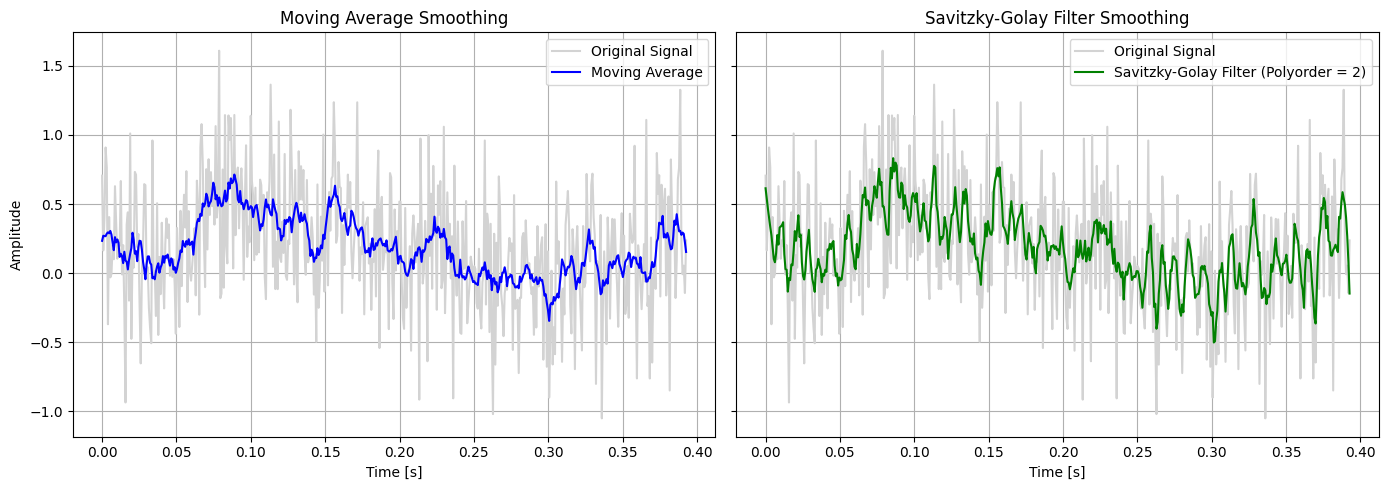

In [20]:
# Regenerate the same signal with fewer periods for better zoom
np.random.seed(0)
x = np.linspace(0, 0.125 * np.pi, 500)  # reduced period range
y = np.sin(x) + 0.3 * np.sin(15 * x) + 0.4 * np.random.randn(len(x))

# Add artificial sharp spikes and valleys
y[100] += 0.5
y[150] -= 0.5
y[300] -= 0.5
y[350] += 0.5

# Apply Moving Average
window_size = 11
y_ma = np.convolve(y, np.ones(window_size)/window_size, mode='same')

# Apply Savitzky-Golay filter
y_sg = savgol_filter(y, window_length=11, polyorder=2)

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].plot(x, y, color='lightgray', label='Original Signal')
axs[0].plot(x, y_ma, color='blue', label='Moving Average')
axs[0].set_title('Moving Average Smoothing')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x, y, color='lightgray', label='Original Signal')
axs[1].plot(x, y_sg, color='green', label='Savitzky-Golay Filter (Polyorder = 2)')
axs[1].set_title('Savitzky-Golay Filter Smoothing')
axs[1].set_xlabel('Time [s]')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

# Save the plot to a specific path
output_path = "Plots/filter_comparison.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300)

plt.show()
